# Reddit Classification 

## Notebook 2 of 5 - Base Model, Data Cleaning and EDA

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer 
from nltk.corpus import stopwords 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.pipeline import Pipeline 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from datetime import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
sns.set_theme()

In [2]:
# Importing the 'anxiety file
anxiety_df = pd.read_csv('datasets/anxiety.csv')

In [3]:
anxiety_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15242 entries, 0 to 15241
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15242 non-null  int64 
 1   date_time   15242 non-null  object
 2   subreddit   15242 non-null  object
 3   selftext    14562 non-null  object
 4   title       15242 non-null  object
dtypes: int64(1), object(4)
memory usage: 595.5+ KB


In [4]:
# Concatenate between title and selftext with a space inbetween and create a new column
anxiety_df['title_text'] = anxiety_df['title'] +' '+ anxiety_df['selftext'].fillna('')

In [5]:
# Select these 3 columns only from the dataframe
anxiety_df = anxiety_df[['subreddit','title_text','date_time']]

In [6]:
anxiety_df

,subreddit,title_text,date_time
0,Anxiety,Aching across chest and stomach and tiredness ...,2022-10-03 07:50:04
1,Anxiety,"Very cold hands and feet while anxious Hey, so...",2022-10-03 07:49:48
2,Anxiety,Feeling of lost sensation I keep feeling like ...,2022-10-03 07:42:30
3,Anxiety,needs someone to talk to.. hi im dealing with ...,2022-10-03 07:41:39
4,Anxiety,Nothing helps my anxiety apart from benzodiaze...,2022-10-03 07:38:55
...,...,...,...
15237,Anxiety,"I hate talking about myself Like seriously, ha...",2022-08-01 04:40:47
15238,Anxiety,Absolutely petrified of going to college I str...,2022-08-01 04:30:02
15239,Anxiety,Trouble being interesting My biggest insecurit...,2022-08-01 04:29:46
15240,Anxiety,Tight throat throughout the day / waking up mu...,2022-08-01 04:27:03


In [7]:
# Importing the 'depression file
depression_df = pd.read_csv('datasets/depression.csv')

In [8]:
depression_df.head()

,Unnamed: 0,date_time,subreddit,selftext,title
0,0,2022-10-03 07:49:52,depression,I was in the hospital due to depression. I was...,suicidal ideation spectrum
1,1,2022-10-03 07:49:11,depression,It seems like it just gets worse and worse. So...,Need Advice
2,2,2022-10-03 07:46:13,depression,"I don’t know where to begin, but I think I’m n...",I’m giving up
3,3,2022-10-03 07:40:33,depression,[removed],The world is a lonely place
4,4,2022-10-03 07:39:03,depression,[removed],Trigger warning: My friend commited suicide a ...


In [9]:
depression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15238 entries, 0 to 15237
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15238 non-null  int64 
 1   date_time   15238 non-null  object
 2   subreddit   15238 non-null  object
 3   selftext    15238 non-null  object
 4   title       15238 non-null  object
dtypes: int64(1), object(4)
memory usage: 595.4+ KB


In [10]:
# Concatenate between title and selftext with a space inbetween and create a new column
depression_df['title_text'] = depression_df['title'] +' '+ depression_df['selftext'].fillna('')

In [11]:
# Select these 3 columns only from the dataframe
depression_df = depression_df[['subreddit','title_text','date_time']]

In [12]:
depression_df

,subreddit,title_text,date_time
0,depression,suicidal ideation spectrum I was in the hospit...,2022-10-03 07:49:52
1,depression,Need Advice It seems like it just gets worse a...,2022-10-03 07:49:11
2,depression,"I’m giving up I don’t know where to begin, but...",2022-10-03 07:46:13
3,depression,The world is a lonely place [removed],2022-10-03 07:40:33
4,depression,Trigger warning: My friend commited suicide a ...,2022-10-03 07:39:03
...,...,...,...
15233,depression,"December 31, 2022 I am so tired of everything ...",2022-08-23 12:13:43
15234,depression,I feel so empty now I don't know what to do an...,2022-08-23 12:09:46
15235,depression,Are psychology and psychotherapy a fraud? I am...,2022-08-23 12:02:33
15236,depression,Tried to kill myself today and can't even do t...,2022-08-23 11:57:36


In [13]:
# Checking that the concat is done correctly
depression_df['title_text'][0]

"suicidal ideation spectrum I was in the hospital due to depression. I was reading my progress notes and it stated I was laying on bed crying and telling the nurse I want to die and I don't want to live anymore. I don't remember this but I know I was not suicidal. \n\nI was wondering if this is considered suicidal ideation because they wrote in my notes that I was suicidal? Can it lead to a misdiagnosis if I know I was not suicidal?"

In [14]:
# Combining the two dataframes
anxiety_depression = pd.concat([anxiety_df,depression_df],ignore_index=True)

In [15]:
anxiety_depression

,subreddit,title_text,date_time
0,Anxiety,Aching across chest and stomach and tiredness ...,2022-10-03 07:50:04
1,Anxiety,"Very cold hands and feet while anxious Hey, so...",2022-10-03 07:49:48
2,Anxiety,Feeling of lost sensation I keep feeling like ...,2022-10-03 07:42:30
3,Anxiety,needs someone to talk to.. hi im dealing with ...,2022-10-03 07:41:39
4,Anxiety,Nothing helps my anxiety apart from benzodiaze...,2022-10-03 07:38:55
...,...,...,...
30475,depression,"December 31, 2022 I am so tired of everything ...",2022-08-23 12:13:43
30476,depression,I feel so empty now I don't know what to do an...,2022-08-23 12:09:46
30477,depression,Are psychology and psychotherapy a fraud? I am...,2022-08-23 12:02:33
30478,depression,Tried to kill myself today and can't even do t...,2022-08-23 11:57:36


In [16]:
# Mapping subredit: Anxiety = 1, depression = 0 
anxiety_depression['subreddit'] = anxiety_depression['subreddit'].map({'Anxiety':1,'depression':0})

In [17]:
# Renaming response column so that it would not be a common word (i.e. there might be post that contains the word 'subreddit')
anxiety_depression.rename(columns={'subreddit':'is_anxiety'},inplace=True)

In [18]:
anxiety_depression

,is_anxiety,title_text,date_time
0,1,Aching across chest and stomach and tiredness ...,2022-10-03 07:50:04
1,1,"Very cold hands and feet while anxious Hey, so...",2022-10-03 07:49:48
2,1,Feeling of lost sensation I keep feeling like ...,2022-10-03 07:42:30
3,1,needs someone to talk to.. hi im dealing with ...,2022-10-03 07:41:39
4,1,Nothing helps my anxiety apart from benzodiaze...,2022-10-03 07:38:55
...,...,...,...
30475,0,"December 31, 2022 I am so tired of everything ...",2022-08-23 12:13:43
30476,0,I feel so empty now I don't know what to do an...,2022-08-23 12:09:46
30477,0,Are psychology and psychotherapy a fraud? I am...,2022-08-23 12:02:33
30478,0,Tried to kill myself today and can't even do t...,2022-08-23 11:57:36


# Base Model

- For the base model, no preprocessing was done and the `title_text` was directly input into the vectoriser and estimator model.
- Vectoriser: CountVectorizer()
- Estimator: LogisticRegression()

In [19]:
# Assigning the X and y
X = anxiety_depression['title_text']
y = anxiety_depression['is_anxiety']

In [20]:
# This is a balanced dataset
y.value_counts(normalize = True)

1    0.500066
0    0.499934
Name: is_anxiety, dtype: float64

In [21]:
# Splitting the data for training and testing, a default test size of 0.25 was applied
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X,
                                                                        y,
                                                                        stratify=y,
                                                                        random_state=42)

In [22]:
X_train_base

6748     tips to sleep better Recently I've started an ...
29320    i hate my life 。\ni wake up everyday feeling n...
10329    Skin picking (19f) with bad social skills// \n...
3180     Dont know whats real anymore?. Really. I dont ...
16214    Brushing my teeth is hard. All my energy snaps...
                               ...                        
9064     clonindine Has anyone taken this to help with ...
19564    Started sertraline 50mg what side effects did ...
19967    I wish it'd all end I want it all to end right...
791      Just started fluoxetine, Advice? Hello. I iust...
19021    is this depression? Since the End of summer i ...
Name: title_text, Length: 22860, dtype: object

In [23]:
# Instantiate a CountVectorizer with the default hyperparameters.
cvec = CountVectorizer()

In [24]:
# Fit the vectorizer on our corpus and transform it.
X_train_base_vec = cvec.fit_transform(X_train_base)

In [25]:
# After vectorization, it has 32132 'dimensions'.
X_train_base_vec

<22860x32132 sparse matrix of type '<class 'numpy.int64'>'
	with 1832390 stored elements in Compressed Sparse Row format>

In [26]:
# Vectorize the X_test
X_test_base_vec = cvec.transform(X_test_base)

In [27]:
# Instantiate the estimator, a max_iter of 700 was applied to overcome a convergence issue.
logisreg = LogisticRegression(max_iter=700)

In [28]:
# Fitting to logisticRegression model.
logisreg.fit(X_train_base_vec,y_train_base)

LogisticRegression(max_iter=700)

In [29]:
# Check the prediction from test results
logisreg.predict(X_test_base_vec)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [30]:
# Check the training score
logisreg.score(X_train_base_vec, y_train_base)

0.9709536307961505

In [31]:
# Check the train score
logisreg.score(X_test_base_vec, y_test_base)

0.8863517060367454

In [32]:
# Get the confusion matrix from the predicted labels and compared to true labels
confusion_matrix(y_test_base, logisreg.predict(X_test_base_vec))

array([[3450,  360],
       [ 506, 3304]], dtype=int64)

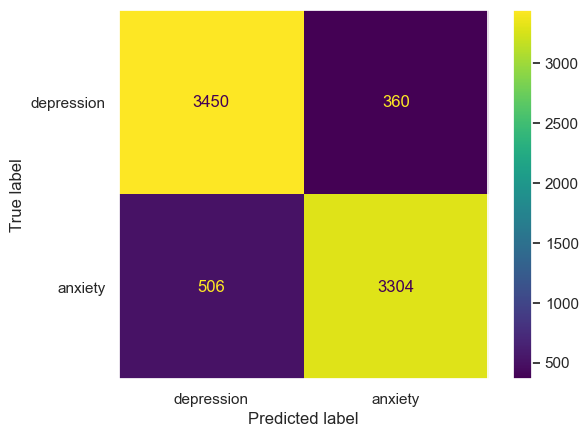

In [33]:
# Plotting the confusion matrix
cm_base = confusion_matrix(y_test_base, logisreg.predict(X_test_base_vec))
dist = ConfusionMatrixDisplay(confusion_matrix=cm_base, display_labels=['depression', 'anxiety'])
dist.plot()
plt.grid(False)

- The Base Model of using CountVectorizer and Logistic Regression has provided a good baseline model of classifying 'Anxiety' and 'Depression' with scores of 88.6% accuracy. 
- However, the train score is 97.1% which is higher than the test score which suggest that it is overfitted.
- It is also observed that the dimensionality is too high where the number of columns is more than the number of rows.

# Pre-Processing
- Regex
- Remove duplicated rows
- Tokenizing (Via-Vectorization)
- Lemmatizing/Stemming (Via-Vectorization)
- Stop word removal (Via-Vectorization + Custom Words)

## Regex 
- To retrive only characters and remove special characters and numbers

In [34]:
# Creating a Regex function to select only text .
def split_it(text):
    x = re.findall("[a-zA-Z]+", str(text))
    return(' '.join(x))

In [35]:
# Creating a new column 'title_text_re'
anxiety_depression['title_text_re'] = anxiety_depression['title_text'].apply(split_it)

In [36]:
anxiety_depression

,is_anxiety,title_text,date_time,title_text_re
0,1,Aching across chest and stomach and tiredness ...,2022-10-03 07:50:04,Aching across chest and stomach and tiredness ...
1,1,"Very cold hands and feet while anxious Hey, so...",2022-10-03 07:49:48,Very cold hands and feet while anxious Hey so ...
2,1,Feeling of lost sensation I keep feeling like ...,2022-10-03 07:42:30,Feeling of lost sensation I keep feeling like ...
3,1,needs someone to talk to.. hi im dealing with ...,2022-10-03 07:41:39,needs someone to talk to hi im dealing with in...
4,1,Nothing helps my anxiety apart from benzodiaze...,2022-10-03 07:38:55,Nothing helps my anxiety apart from benzodiaze...
...,...,...,...,...
30475,0,"December 31, 2022 I am so tired of everything ...",2022-08-23 12:13:43,December I am so tired of everything and every...
30476,0,I feel so empty now I don't know what to do an...,2022-08-23 12:09:46,I feel so empty now I don t know what to do an...
30477,0,Are psychology and psychotherapy a fraud? I am...,2022-08-23 12:02:33,Are psychology and psychotherapy a fraud I am ...
30478,0,Tried to kill myself today and can't even do t...,2022-08-23 11:57:36,Tried to kill myself today and can t even do t...


In [37]:
# Count how many columns that is not able to extract the text
(anxiety_depression['title_text_re'] == '').sum()

1

In [38]:
# Regex cannot detect this type of font, there is no output
anxiety_depression[anxiety_depression['title_text_re'] == '']

,is_anxiety,title_text,date_time,title_text_re
30030,0,𝕨𝕙𝕒𝕥 𝕒 𝕝𝕠𝕒𝕕 𝕠𝕗 𝕠𝕝𝕕 𝕓𝕠𝕝𝕝𝕠𝕔𝕜𝕤 ☠︎︎ Ⓢ︎Ⓞ︎Ⓜ︎Ⓔ︎Ⓑ︎Ⓞ︎Ⓓ︎...,2022-08-24 18:03:11,


In [39]:
# Since there is only one column that cannot be processed, it will be dropped
anxiety_depression.drop(index=30030,inplace=True)

## Removing duplicated Rows

In [40]:
# Check if there are any duplicated rows 
anxiety_depression['title_text_re'].duplicated().sum()

572

In [41]:
anxiety_depression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30479 entries, 0 to 30479
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   is_anxiety     30479 non-null  int64 
 1   title_text     30479 non-null  object
 2   date_time      30479 non-null  object
 3   title_text_re  30479 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [42]:
# Since there are 572 duplicated rows, it shalled be dropped as it is only 1.87% of data.
anxiety_depression.drop_duplicates(subset='title_text_re',ignore_index=True,inplace=True)

## Stopwords
Create a `custom_stop_words` list with stop words list from CountVectorizer and TfidfVectorizer and from EDA in the next section

In [43]:
# Check the stopwords in CountVectorizer
print(CountVectorizer(stop_words = 'english').get_stop_words())

frozenset({'i', 'hundred', 'his', 'fifty', 'namely', 'so', 'behind', 'such', 'own', 'whatever', 'the', 'twenty', 'thereupon', 'but', 'without', 'up', 'themselves', 'then', 'therein', 'toward', 'too', 'became', 'becoming', 'afterwards', 'also', 'seem', 'seems', 'whereby', 'what', 'anyhow', 'mine', 'rather', 'latter', 'put', 'describe', 'formerly', 'cry', 'off', 'con', 'through', 'sixty', 'other', 'been', 'per', 'detail', 'nevertheless', 'co', 'only', 'from', 'keep', 'three', 'give', 'whereafter', 'made', 'thereafter', 'further', 'etc', 'full', 'well', 'any', 'that', 'until', 'at', 'therefore', 'before', 'somehow', 'has', 'below', 'them', 'less', 'first', 'they', 'more', 'had', 'nothing', 'eg', 'inc', 'least', 'where', 'somewhere', 'now', 'these', 'always', 'everything', 'may', 'him', 'twelve', 'her', 'hereafter', 'must', 'nowhere', 'never', 'fill', 'ours', 'each', 'she', 'none', 'can', 'nobody', 'everyone', 'done', 'get', 'being', 'else', 'many', 'side', 'during', 'might', 'otherwise', 

In [44]:
# Check the stopwords in TFIDFVectorizer
print(TfidfVectorizer(stop_words = 'english').get_stop_words())

frozenset({'i', 'hundred', 'his', 'fifty', 'namely', 'so', 'behind', 'such', 'own', 'whatever', 'the', 'twenty', 'thereupon', 'but', 'without', 'up', 'themselves', 'then', 'therein', 'toward', 'too', 'became', 'becoming', 'afterwards', 'also', 'seem', 'seems', 'whereby', 'what', 'anyhow', 'mine', 'rather', 'latter', 'put', 'describe', 'formerly', 'cry', 'off', 'con', 'through', 'sixty', 'other', 'been', 'per', 'detail', 'nevertheless', 'co', 'only', 'from', 'keep', 'three', 'give', 'whereafter', 'made', 'thereafter', 'further', 'etc', 'full', 'well', 'any', 'that', 'until', 'at', 'therefore', 'before', 'somehow', 'has', 'below', 'them', 'less', 'first', 'they', 'more', 'had', 'nothing', 'eg', 'inc', 'least', 'where', 'somewhere', 'now', 'these', 'always', 'everything', 'may', 'him', 'twelve', 'her', 'hereafter', 'must', 'nowhere', 'never', 'fill', 'ours', 'each', 'she', 'none', 'can', 'nobody', 'everyone', 'done', 'get', 'being', 'else', 'many', 'side', 'during', 'might', 'otherwise', 

In [45]:
# Custom stopwords that were gathered from the dataset that are either not relevant or title words
stop_words = frozenset(['removed','deleted','anxiety','anxious','depression','depressed'])

In [46]:
# Since CountVectorizer and TFIDF has the same stopwords, we add in to our stop word list to create a custom_stop_word list
custom_stop_words = stop_words.union(CountVectorizer(stop_words = 'english').get_stop_words())

In [47]:
custom_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'anxiety',
           'anxious',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below

In [48]:
# Removing stop_words
cvec2 = CountVectorizer(stop_words = custom_stop_words)

In [49]:
X_train_base_vec2 = cvec2.fit_transform(X_train_base)

In [50]:
X_train_base_df = pd.DataFrame(X_train_base_vec2.toarray(), columns=cvec2.get_feature_names_out())

# EDA

## Keywords were identified and removed by adding to the custom stop words list above.

In [51]:
# Checking the keywords by count using CountVectorizer
X_train_base_df.sum().sort_values(ascending=False).head(40)

just       27890
like       24767
feel       20893
don        18382
ve         14615
know       13616
want       11479
life       11170
time       10438
really     10093
people      8325
going       7546
think       7003
day         6860
help        6701
feeling     6403
things      6330
years       5865
work        5571
friends     5371
bad         5170
got         5124
make        4647
need        4382
having      4376
anymore     4361
talk        4358
im          4340
better      4322
good        4278
way         4206
getting     4134
started     3998
ll          3805
school      3726
felt        3712
year        3693
didn        3685
panic       3681
days        3649
dtype: int64

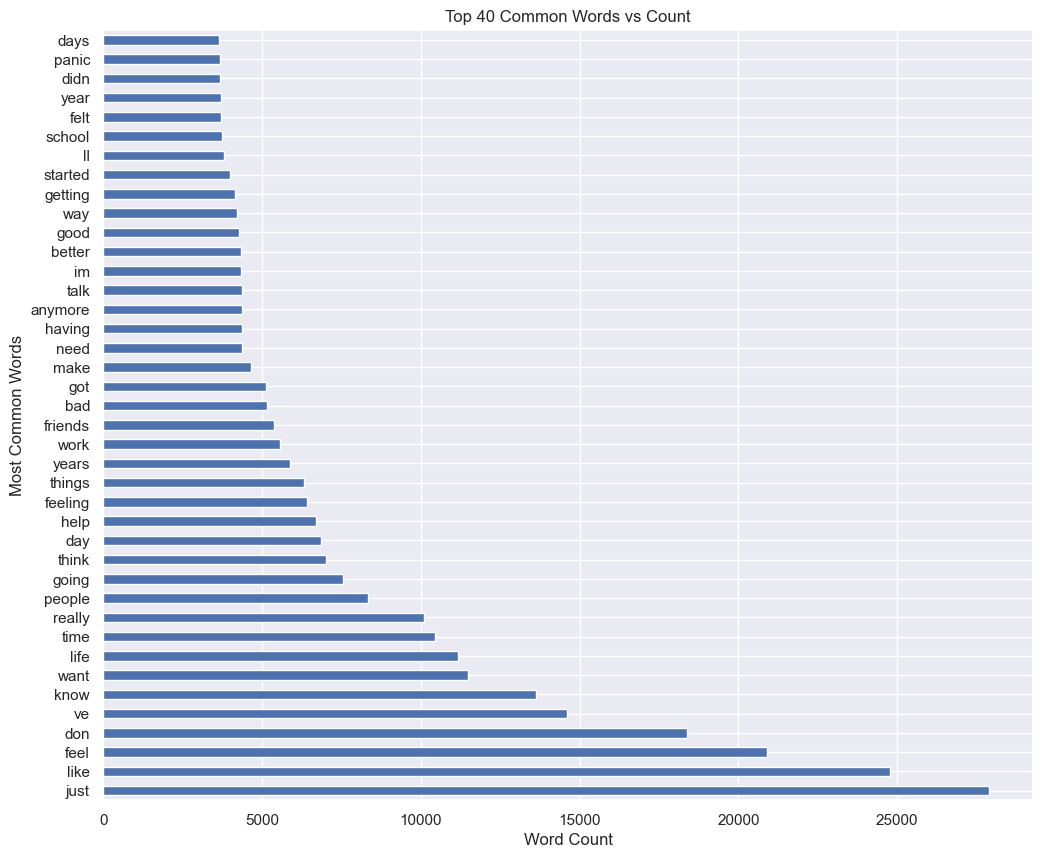

In [52]:
# Unigram - plot of top 40 (previous plots observed some stopwords that is keyword to the topics which 
# were removed, till this final version)
plt.figure(figsize=(12,10))
plt.xlabel('Word Count')
plt.ylabel('Most Common Words')
plt.title('Top 40 Common Words vs Count')
X_train_base_df.sum().sort_values(ascending=False).head(40).plot(kind="barh");

## Looking into Bigram and Trigram for keywords

In [53]:
# Bigram
# Look at list of most common words for bigram
cvec_bi = CountVectorizer(stop_words=custom_stop_words,ngram_range=(2,2), max_features = 10000)
vec_bi = cvec_bi.fit_transform(anxiety_depression['title_text_re'])
vec_bi_df = pd.DataFrame(vec_bi.todense(), columns=cvec_bi.get_feature_names_out())
vec_bi_df.sum().sort_values(ascending=False).head(10)

feel like        10224
don know          6998
don want          3703
just want         2524
feels like        2212
panic attack      1983
panic attacks     1736
just feel         1534
just don          1365
mental health     1348
dtype: int64

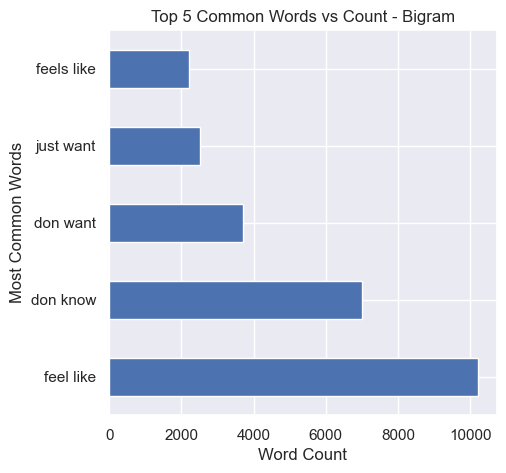

In [54]:
# Bigram - plot of top 5 words
plt.figure(figsize=(5,5))
plt.xlabel('Word Count')
plt.ylabel('Most Common Words')
plt.title('Top 5 Common Words vs Count - Bigram')
vec_bi_df.sum().sort_values(ascending=False).head(5).plot(kind="barh");

In [55]:
#Trigram
#Look at list of most common words for trigram
cvec_tri = CountVectorizer(stop_words=custom_stop_words,ngram_range=(3,3), max_features = 10000)
vec_tri = cvec_tri.fit_transform(anxiety_depression['title_text_re'])
vec_tri_df = pd.DataFrame(vec_tri.toarray(), columns=cvec_tri.get_feature_names_out())
vec_tri_df.sum().sort_values(ascending=False).head(10)

just feel like      535
just don know       504
don feel like       473
don know anymore    397
feel like going     318
feel like just      288
feel like ve        280
feel like don       265
makes feel like     263
don know feel       244
dtype: int64

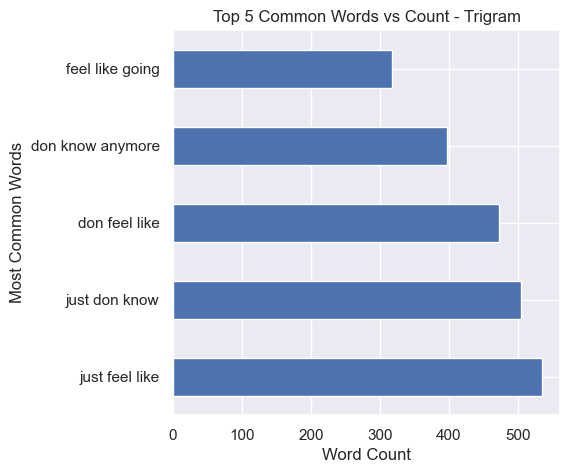

In [56]:
#Trigram - plot of top 5 words
plt.figure(figsize=(5,5))
plt.xlabel('Word Count')
plt.ylabel('Most Common Words')
plt.title('Top 5 Common Words vs Count - Trigram')
vec_tri_df.sum().sort_values(ascending=False).head(5).plot(kind="barh");

From the above, we observed that the bigram and trigram produces the same types of words used in the text. These are not key words in either of the classes. Thus, the custom stop words created fufills the criteria of removing keywords that can easily fall into the classes.

## Exploring the length of posts (word count and character count)

In [57]:
anxiety_depression['title_text_re'].apply(len)

0         354
1        1763
2         390
3         189
4         486
         ... 
29902     976
29903     592
29904     593
29905     475
29906     906
Name: title_text_re, Length: 29907, dtype: int64

In [58]:
# Creating another column for character count for each post
anxiety_depression['status_length'] = anxiety_depression['title_text_re'].apply(len)

In [59]:
anxiety_depression['title_text_re'].apply(lambda n: len(n.split()))

0         70
1        339
2         80
3         37
4         91
        ... 
29902    206
29903    130
29904    108
29905    105
29906    188
Name: title_text_re, Length: 29907, dtype: int64

In [60]:
# Creating another column for word count for each post
anxiety_depression['status_word_count'] = anxiety_depression['title_text_re'].apply(lambda n: len(n.split()))

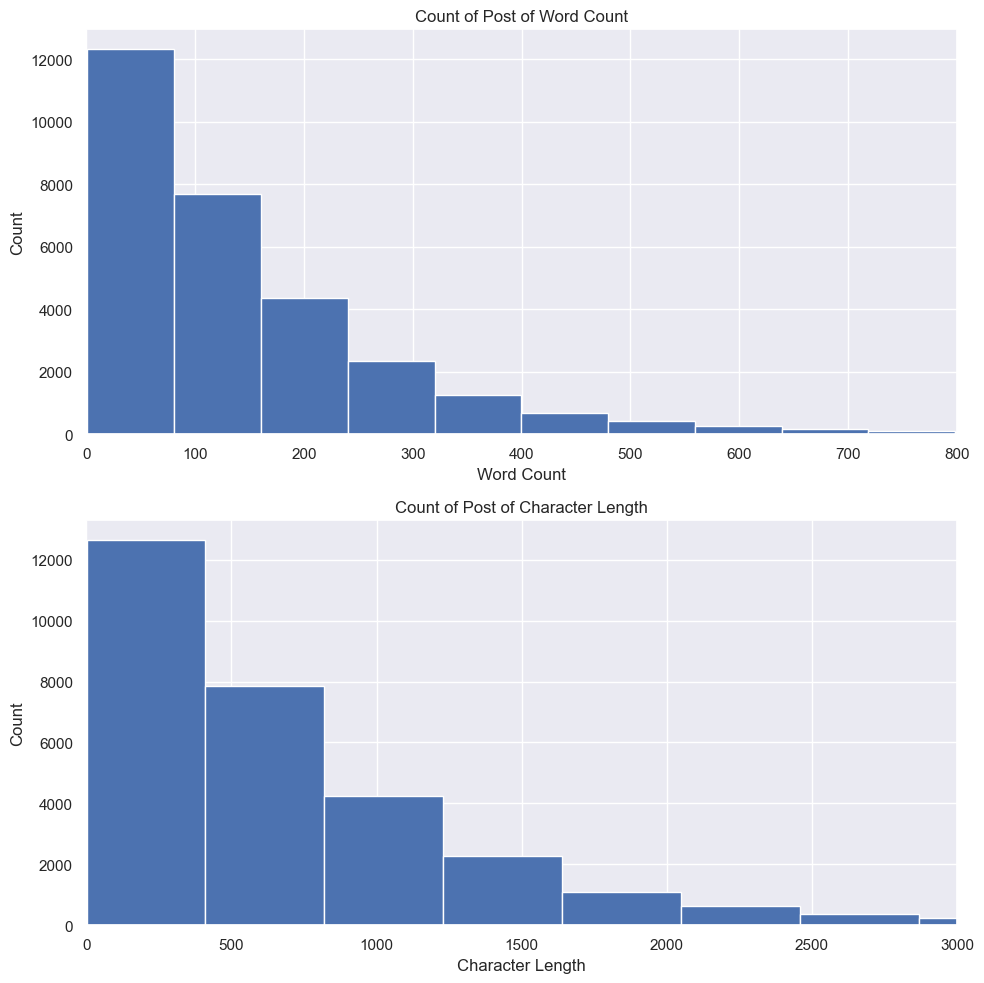

In [61]:
# Plots of Word and Character Count and total counts
fig, axes = plt.subplots(2, 1, figsize=(10,10))

anxiety_depression.hist('status_word_count', ax=axes[0], bins = 50)
anxiety_depression.hist('status_length', ax=axes[1], bins = 50)

axes[0].set_title('Count of Post of Word Count')
axes[1].set_title('Count of Post of Character Length')
axes[0].set_xlabel('Word Count')
axes[1].set_xlabel('Character Length')
axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')
axes[0].set_xlim([0,800])
axes[1].set_xlim([0,3000])
plt.tight_layout()

In [62]:
# There are 96.4% of post with less than 512 words.
(anxiety_depression['status_word_count']<512).sum()/len(anxiety_depression)*100

96.41889858561541

It is observed that 96.4% of the post have word count less than 512 words.  
Both Word Count and Character length have right tailed distributions

## Exploring the date of the posts

In [63]:
# 'date_time' column was imported as dtype object
# The time is based on GMT+8
anxiety_depression['date_time']

0        2022-10-03 07:50:04
1        2022-10-03 07:49:48
2        2022-10-03 07:42:30
3        2022-10-03 07:41:39
4        2022-10-03 07:38:55
                ...         
29902    2022-08-23 12:13:43
29903    2022-08-23 12:09:46
29904    2022-08-23 12:02:33
29905    2022-08-23 11:57:36
29906    2022-08-23 11:44:58
Name: date_time, Length: 29907, dtype: object

In [64]:
# Converting date_time to datetime format and extract the day of the week
# Then count the days
# For info, 0:Monday, 1:Tuesday, 2:Wednesday, 3:Thursday, 4:Friday, 5:Saturday, 6:Sunday
pd.to_datetime(anxiety_depression['date_time']).dt.dayofweek.value_counts().sort_index()

0    4468
1    4335
2    4550
3    4371
4    4029
5    3950
6    4204
Name: date_time, dtype: int64

In [65]:
# Storing the values into a new column
anxiety_depression['day'] = pd.to_datetime(anxiety_depression['date_time']).dt.dayofweek

In [66]:
# Count the All post vs day of week
anxiety_depression['day'].value_counts().sort_index()

0    4468
1    4335
2    4550
3    4371
4    4029
5    3950
6    4204
Name: day, dtype: int64

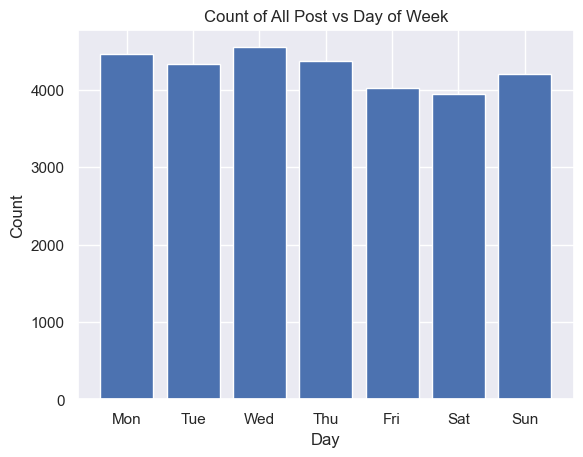

In [67]:
# Plot of Count of All Post vs Day of Week
plt.title('Count of All Post vs Day of Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.bar(x=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],height=(anxiety_depression['day']).value_counts().sort_index());

In [68]:
# Count the total post from subreddit topic 'Anxiety' vs day of week
anxiety_depression[anxiety_depression['is_anxiety'] == 1]['day'].value_counts().sort_index()

0    2310
1    2247
2    2327
3    2177
4    2079
5    1965
6    2005
Name: day, dtype: int64

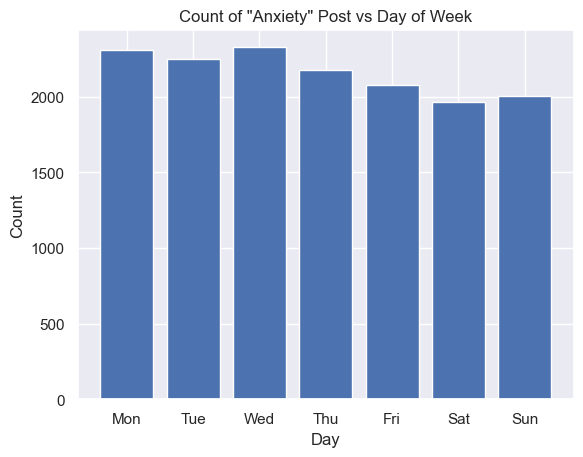

In [69]:
# Plot of the total post from subreddit topic 'Anxiety' vs day of week
plt.title('Count of "Anxiety" Post vs Day of Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.bar(x=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],height=(anxiety_depression[anxiety_depression['is_anxiety'] == 1]['day']).value_counts().sort_index());

In [70]:
# Count the total post from subreddit topic 'Depression' vs day of week
anxiety_depression[anxiety_depression['is_anxiety'] == 0]['day'].value_counts().sort_index()

0    2158
1    2088
2    2223
3    2194
4    1950
5    1985
6    2199
Name: day, dtype: int64

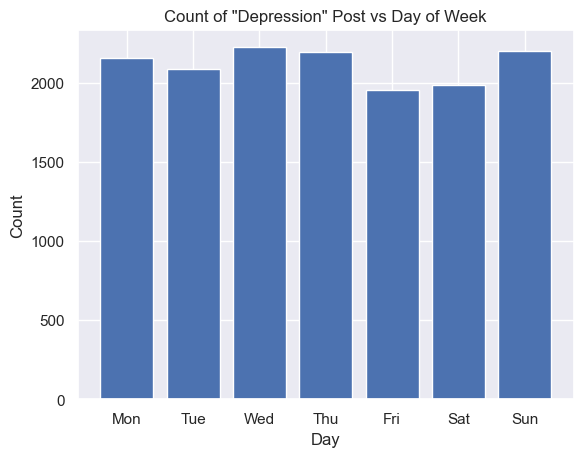

In [71]:
# Plot of the total post from subreddit topic 'Depression' vs day of week
plt.title('Count of "Depression" Post vs Day of Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.bar(x=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],height=(anxiety_depression[anxiety_depression['is_anxiety'] == 0]['day']).value_counts().sort_index());

- There is not much difference in the number of post per day for both subreddit topics.

# Exporting data for modeling

In [72]:
anxiety_depression.to_csv('datasets/anxiety_depression.csv', index=False)

Summary
- The Base Model of using CountVectorizer and Logistic Regression has provided a good baseline model of classifying 'Anxiety' and 'Depression' with scores of 88.6% accuracy. 
- However, the train score is 97.1% which is higher than the test score which suggest that it is overfitted.
- It is also observed that the dimensionality is too high where the number of columns is more than the number of rows.  

The following pre-processing steps were done 
- Regex (Only text words were captured)
- Remove duplicated rows (572 duplicated rows)
- Tokenizing (Via-Vectorization)
- Lemmatizing/Stemming (Via-Vectorization)
- Stop word removal (Via-Vectorization + Custom Words)

The following EDA were done
- Look into Unigram, Bigram and Trigram to check if any words should be include in the custom_stop_words
- It is observed that the bigram and trigram produces the same types of words used in the text. These are not key words in either of the classes. Thus, the custom stop words created fufills the criteria of removing keywords that can easily fall into the classes.
- Exploring into the length of post which is observed that 96.5% of the post have word count less than 512 words.  
- Both Word Count and Character length have right tailed distributions
- Exploring into the days of post: There is not much difference in the number of post per day for both subreddit topics.

The next notebook (Notebook 3) will be looking into vectorization and modelling.